# Método de Euler: Seguimiento de partículas en un fluido

**Objetivo**.

- Mediante la aplicación del método de Euler realice el seguimiento de varias partículas dentro de un flujo encerrado en un dominio rectangular.

**Objetivos particulares**
- Aplicar el pensamiento computacional para definir los pasos a seguir en la solución de este proyecto.
- Realizar un ejercicio con un campo de velocidad diferente.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Analisis_Numerico_01">MACTI-Analisis_Numerico_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101922**

## Contenido
- [1. Descripción.](#1)
- [2. Pensamiento computacional.](#2)
    - [2.1 Modelo matemático. ](#2-1)
    - [2.2 Definición del dominio de estudio. ](#2-2)
    - [2.3 Definición del flujo. ](#2-3)
    - [2.4 Posición inicial de las partículas. ](#2-4)
    - [2.5 Modelo numérico. ](#2-5)
        - [Ejercicio 1. Método de Euler.](#ej-1)
    - [2.6 Integración de todo el código. ](#2-6)
        - [Ejercicio 2. Seguimiento de las partículas.](#ej-2)
    - [2.7 Creación de una animación. ](#2-7)
- [Ejercicio 3.](#ej-3)

<a name='1'></a>
## Descripción.

Si soltamos varias partículas en un flujo, dichas partículas seguirán la dirección del movimiento y delinearán varias trayectorias como se oberva en el siguiente video:

<video src="./part_track.mp4" width="500" controls></video>

Si pudieramos definir la velocidad de un fluido y un conjunto inicial de partículas **¿cómo podríamos calcular las trayectorias de las partículas dentro del flujo?**

In [4]:
# Importamos las bibliotecas
import matplotlib.pyplot as plt
import numpy as np
from time import time
import macti.visual as mvis

<a name='2'></a>
## Pensamiento Computacional

<a name='2-1'></a>
### Paso 1. Modelo matemático

Si definimos $\vec{X} \equiv (x, y)$ como la posición de una partícula y $\vec{V} \equiv (u, v)$ como su velocidad, podemos escribir un PVI *vectorial en 2D* como sigue:

$$
\begin{eqnarray}
\dfrac{d \vec{X}}{dt} & = & \vec{V}(t, \vec{X}) \qquad \text{para} \quad 0 < t < N_t \\
\vec{X}(t=0) & = & (x^0, y^0) \qquad \text{(condición inicial)}
\end{eqnarray}
$$

donde $(x, y) \in [0, Lx] \times [0, Ly]$ y $\vec{X}(t=0)$ representa la posición inicial de una partícula.

El PVI anterior se puede separar por componentes:

$$
\begin{array}{ccc|cccc}
\dfrac{d x}{dt} & = & u(t, \vec{X}) \qquad & \qquad 
\dfrac{d y}{dt} & = & v(t, \vec{X}) \qquad & \text{para} \quad 0 < t < N_t \\
x(t=0) & = & x^0 \qquad & \qquad 
y(t=0) & = & y^0 \qquad & \text{(condición inicial)}
\end{array}
$$

Entonces, para calcular la posición de un partícula, debemos resolver los dos PVI descritos antes. Para ello usaremos el **Metodo de Euler** (hacia adelante).

<a name='2-2'></a>
### Paso 2. Definición del dominio de estudio.

Definimos un dominio de tamaño $L_x = 3.0$ y $L_y=1.0$ y una malla de tamaño $N_x=30$ y $N_y=15$.

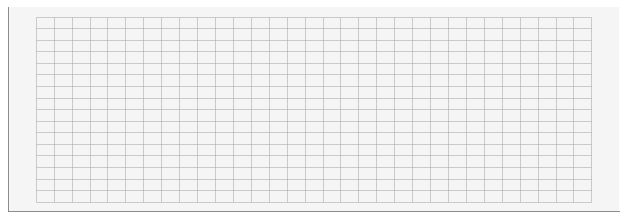

In [5]:
#Tamaño del domuinio
ax, bx = (0, 3.0) # Lx
ay, by = (0, 1.0) # Ly

# Definición de la malla
Nx = 30
Ny = 15
x = np.linspace(ax,bx,Nx+2)
y = np.linspace(ay,by,Ny+2)
xg, yg = np.meshgrid(x, y, indexing='ij', sparse=False)

# Graficamos la malla.
axis_par = [dict(aspect='equal')]
fig_par = dict(figsize=(8,4))
vis = mvis.Plotter(1,1, axis_par, fig_par)
vis.plot_mesh2D(1, xg, yg)

<a name='2-3'></a>
### Paso 3. Definición del flujo.

Vamos a usar el siguiente campo de velocidad $\vec{V}(t, \vec{X}) = (u, v)$:

$$
\begin{eqnarray}
u & = & -\cos(\alpha \pi y) \sin(\alpha \pi x) +  \cos(\alpha \pi x)\\
v & = & \sin(\alpha \pi y) \cos(\alpha \pi x)
\end{eqnarray}
$$

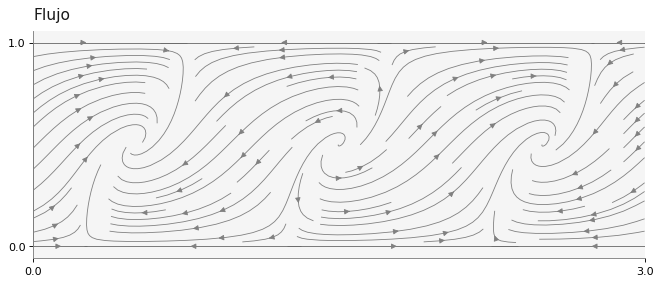

In [6]:
# Parámetros para el campo de velocidad.
α = 1.0
u = lambda x, y: -np.cos(α * np.pi * y) * np.sin(α * np.pi * x) + np.cos(α * np.pi * x)
v = lambda x, y:  np.sin(α * np.pi * y) * np.cos(α * np.pi * x) 

# Graficación del flujo
axis_par = [dict(aspect='equal')]
fig_par = dict(figsize=(8,4))
vis = mvis.Plotter(1,1, axis_par, fig_par)
vis.plot_frame(1, xg, yg)
vis.streamplot(1, xg, yg, u(xg, yg), v(xg,yg), color='gray', linewidth=0.75)
plt.title('Flujo')
plt.show()

<a name='2-4'></a>
### Paso 4. Posición inicial de las partículas.

Definimos una serie de partículas dentro del flujo.

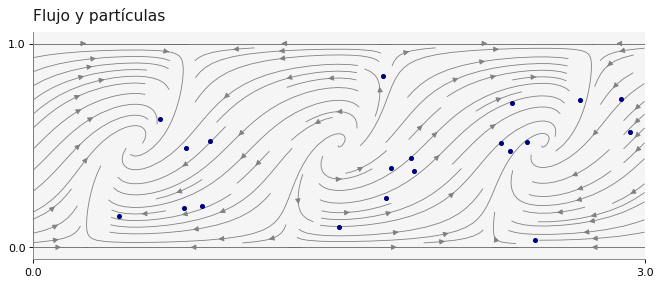

In [7]:
# Transformación lineal
f = lambda x, a, b: (b-a)*x + a 

# Número de partículas
N = 20

# Generación de partículas de manera aleatoria
np.random.seed(int(time()))
coord = np.random.rand(N,2)
coord[:,0] = f(coord[:,0], ax, bx) # Transformación hacia el dominio de estudio
coord[:,1] = f(coord[:,1], ay, by) # Transformación hacia el dominio de estudio

# Graficación de  las partículas y del flujo
axis_par = [dict(aspect='equal')]
fig_par = dict(figsize=(8,4))
vis = mvis.Plotter(1,1, axis_par, fig_par)
vis.plot_frame(1, xg, yg)
vis.streamplot(1, xg, yg, u(xg, yg), v(xg,yg), color='gray', linewidth=0.75)
vis.scatter(1, coord[:,0],coord[:,1],marker='.',color='navy',s=50, alpha=1.00, zorder=20)

plt.title('Flujo y partículas')
plt.show()

<a name='2-5'></a>
### Paso 5. Modelo numérico.

Los PVI definidos para calcular las coordenadas de las partículas, se pueden resolver numéricamente usando la **fórmula de Euler hacia adelante** como sigue:

$$
\begin{array}{ccl|ccl}
x(t=0)  & = & x^0 \qquad & \qquad
y(t=0)  & = & y^0 \qquad \\
x^{n+1} & = & x^{n} + h_t * u (x^{n}, y^{n}) \qquad & \qquad 
y^{n+1} & = & y^{n} + h_t * v (x^{n}, y^{n}) \\
\end{array}
$$

para $n = 1, \dots, N_t$ y donde $(x^{n+1}, y^{n+1})$ representa la posición de la partícula en el instante $n+1$.

En ambos casos se requiere del Método de Euler por lo tanto implementamos una función general para hacer este cálculo como sigue:

---
<a name='ej-1'></a>
#### **<font color="DodgerBlue">Ejercicio 1. Método de Euler.</font>**

<font color="DarkBlue">Implemente en una función el método de Euler</font>

---

In [8]:
# Implemente el método de Euler en una función:
# def euler(x, v, h)
#    ...
### BEGIN SOLUTION
def euler(x, v, h):
    return x + h * v
### END SOLUTION

<a name='2-6'></a>
### Paso 6. Integración de todo el código.

Ahora podemos integrar todo el código realizado hasta ahora para calcular la trayectoria de las partículas.

---
<a name='ej-2'></a>
#### **<font color="DodgerBlue">Ejercicio 2. Seguimiento de las partículas.</font>**

<font color="DarkBlue">Integrar todo el código desarrollado hasta aquí junto con un algoritmo para aplicar el método de Euler a cada partícula con el fin dibujar su trayectoria dentro del flujo. </font>

**Hint**: Para hacer el seguimiento de las partículas debe realizar un doble ciclo similar al siguiente:
```python
# Ciclo temporal para calcular cada posición.
for n in range(1,Nt+1):
    for i in range(0,N):
    ...
```

---

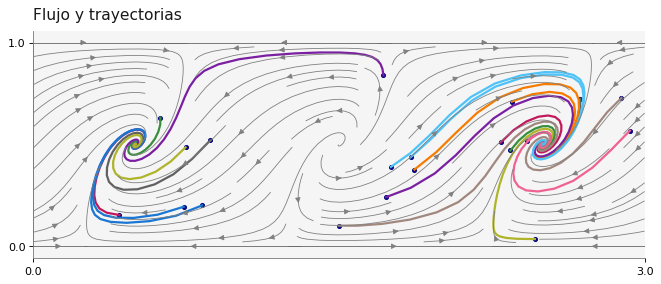

In [9]:
# Parámetros para el modelo numérico
Nt = 50  # Número de pasos en el tiempo
ht = 0.1 # Tamaño del paso de tiempo

# Arreglos para almacenar las N partículas en Nt pasos de tiempo
xn = np.zeros((N,Nt+1))
yn = np.zeros((N,Nt+1))

# Inicialización
for i in range(0,N):
    xn[i, 0] = coord[i,0]
    yn[i, 0] = coord[i,1]

# Implementación del método de euler para ambas coordenadas
### BEGIN SOLUTION
for n in range(1,Nt+1):
    for i in range(0,N):
        xi = xn[i,n-1]
        yi = yn[i,n-1]
        xn[i,n] = euler(xi, u(xi,yi), ht)
        yn[i,n] = euler(yi, v(xi,yi), ht)
### END SOLUTION

axis_par = [dict(aspect='equal')]
fig_par = dict(figsize=(8,4))
vis = mvis.Plotter(1,1, axis_par, fig_par)

for i in range(0,N):
    vis.scatter(1, xn[i,0], yn[i,0], marker = '.', color='navy', s = 50, alpha=0.95, zorder=0)
    vis.plot(1, xn[i,:], yn[i,:], lw=2.0)

vis.plot_frame(1, xg, yg)
vis.streamplot(1, xg, yg, u(xg, yg), v(xg,yg), color='gray', linewidth=0.75)

plt.title('Flujo y trayectorias')
plt.show()

<a name='2-7'></a>
### Paso 7. Creación de una animación.

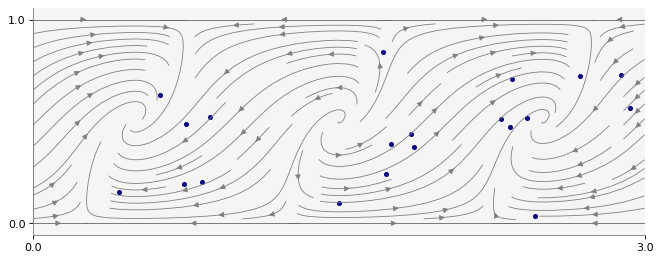

In [12]:
# Importamos la biblioteca para realizar la animación
from matplotlib.animation import FuncAnimation

# Función para actualizar los gráficos.
def update_lines(t, lines, x, y):
    for i,line in enumerate(lines):
        line[0].set_data(x[i,0:t], y[i,0:t])

# Inicialización del primer cuadro de la animación
#fig = plt.figure(figsize=(8,4))

axis_par = [dict(aspect='equal')]
fig_par = dict(figsize=(8,4))
vis = mvis.Plotter(1,1, axis_par, fig_par)

#plt.plot(xn[:,0], yn[:,0], '.', lw = 2.0, zorder=20)
vis.scatter(1, xn[:,0], yn[:,0], marker = '.', color='navy', s = 50, alpha=0.95, zorder=0)
lines = [vis.plot(1, xn[i,0], yn[i,0], lw=2.0) for i in range(N)]

# Creación del objeto de animación
#line_ani = vis.animate(update_lines,
#                       fargs = (lines, xn, yn),
#                       interval = 2000, 
#                       frames = Nt,
#                      )

line_ani = FuncAnimation(vis.fig,     # Obtiene la figura actual
                         update_lines,  # Función que actualiza la figura.
                         Nt,            # Número de pasos en el tiempo.
                         fargs=(lines, xn, yn), # Argumentos para update_lines().
                         interval=2000,  # Tiempo en milisegundos.
                         repeat=False)  # Repetición de la animación en ciclo.
vis.plot_frame(1, xg, yg)
vis.streamplot(1, xg, yg, u(xg, yg), v(xg,yg), color='gray', linewidth=0.75)


In [13]:
from IPython.display import HTML
HTML(line_ani.to_jshtml())

In [ ]:
# Guardamos la animación en un video en formato MP4
# ESTO PUEDE TARDAR UN POCO
#from matplotlib.animation import writers
#Writer = writers['ffmpeg']
#writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=-1)
#line_ani.save('part_track.mp4', writer=writer)

In [ ]:
# Mostramos el video de la animación final:
#from IPython.display import Video
#Video('part_track.mp4', height=300)#, width=500)

<a name='ej-3'></a>
### **<font color="DodgerBlue">Ejercicio 3.</font>**

- <font color="DarkBlue">Modifique el número de partículas hasta obtener un resultado similar al del video inicial.</font>
- <font color="DarkBlue">Modifique el paso de tiempo $h_t$ hasta que las trayectorias se vean suaves y ya no cambien mucho con una disminución posterior de este parámetro.</font>
- <font color="DarkBlue">Sustituya el campo de flujo por el siguiente y realice todo el proceso:</font>
```python
u = lambda x,y : 1*((-1/2 + 5*x**4) - 2*x*(1-x/2+x**5+y**3)) * np.exp(-x**2-y**2)
v = lambda x,y : (3*y**2 - 2*x*(1-x/2+x**5+y**3)) * np.exp(-x**2-y**2)
```

<font color="DarkBlue">Para este caso el dominio será $(ax, bx) = (-3.0, 3.0)$ y $(ay, by) = (-3.0, 3.0)$. La malla tendrá un tamaño de $Nx, Ny = 30, 30$. Ud. deberá obtener algo similar a lo que se muestra en la siguiente figura:</font>

 <table>
  <tr>
    <td><img src="../utils/figs/flujo_y_part.png"  width='400px'/></td>
    <td><img src="../utils/figs/flujo_y_tray.png"  width='400px'/></td>
  </tr>
</table> 